In [297]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.tree import DecisionTreeClassifier

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

from utilize.data import *
from utilize.transform import *
from utilize.feature_selection import *
from utilize.test import *

In [6]:
# Load all the data 
X, y, M, user_index, feature_names, label_names = load_all_data()

In [28]:
X.shape, y.shape, M.shape
X_new.shape, y_new.shape, M_new.shape
X_train.shape, X_test.shape

((363136, 225), (14210, 225))

In [9]:
# Only select body state label
target_label = ['LYING_DOWN', 'SITTING', 'FIX_walking', 'FIX_running', 'BICYCLING', 'OR_standing']

# Use the last 5 user's data as test set
test_uuid = list(range(56, 61))

# Fill the Nan with mean value and normalize all the data 
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('std_scaler', StandardScaler())
])

In [34]:
# Process the feature data and split the train test set

X_new, y_new, M_new = select_target_labels(X, y, M, target_label, label_names, drop_all_zero = False)
#y_new = np.sum(y_new * [1, 2, 3, 4, 5, 6], axis = 1)

X_new = pipeline.fit_transform(X_new, y_new)
X_train, y_train, M_train, X_test, y_test, M_test = split_by_users(X_new, y_new, M_new, test_uuid, user_index)

ValueError: 'label' must be of length 'x'

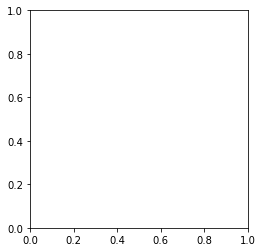

In [12]:
num, freq = np.unique(y_new, return_counts = True)

plt.pie(freq, labels = target_label, autopct='%1.1f%%')
plt.title('Number of body state labels per instance')
plt.show()

In [29]:
# Down sample the test and trainig set, but keep the portion of different classes
sss = StratifiedShuffleSplit(n_splits=1, test_size = 0.1)
for _, index in sss.split(X_train, y_train):
    X_train = X_train[index]
    y_train = y_train[index]
    
for _, index in sss.split(X_test, y_test):
    X_test = X_test[index]
    y_test = y_test[index]

In [290]:
core_sensor = ['raw_acc', 'proc_gyro', 'watch_acceleration', 'audio_naive', 'location', 'discrete']

In [291]:
selected_features = feature_names.copy()
for feature in feature_names:
    if feature.split(':')[0] not in core_sensor:
        selected_features.remove(feature)

In [305]:
from utilize.model import *
mlp = MLP_model([64, 64], target_label)
mlp.fit(X_train, y_train, X_test, y_test, M_train, M_test, epoches = 20, learning_rate = 0.00001, report = True)

Train Epoch: 0 [29700/363136 (8%)]	Loss: 0.613442
Train Epoch: 0 [59700/363136 (16%)]	Loss: 0.584138
Train Epoch: 0 [89700/363136 (24%)]	Loss: 0.429753
Train Epoch: 0 [119700/363136 (32%)]	Loss: 0.510419
Train Epoch: 0 [149700/363136 (41%)]	Loss: 0.506693
Train Epoch: 0 [179700/363136 (49%)]	Loss: 0.560995
Train Epoch: 0 [209700/363136 (57%)]	Loss: 0.460947
Train Epoch: 0 [239700/363136 (66%)]	Loss: 0.414738
Train Epoch: 0 [269700/363136 (74%)]	Loss: 0.501362
Train Epoch: 0 [299700/363136 (82%)]	Loss: 0.481930
Train Epoch: 0 [329700/363136 (90%)]	Loss: 0.546188
Train Epoch: 0 [359700/363136 (99%)]	Loss: 0.426303
Test epoch 0:
accuaracy      sensitivity    specificity    BA             
0.502448       0.909771       0.405820       0.657795       
Train Epoch: 1 [29700/363136 (8%)]	Loss: 0.487810
Train Epoch: 1 [59700/363136 (16%)]	Loss: 0.387577
Train Epoch: 1 [89700/363136 (24%)]	Loss: 0.395129
Train Epoch: 1 [119700/363136 (32%)]	Loss: 0.419110
Train Epoch: 1 [149700/363136 (41%)]	Los

accuaracy      sensitivity    specificity    BA             
0.728114       0.866376       0.688068       0.777222       
Train Epoch: 11 [29700/363136 (8%)]	Loss: 0.281001
Train Epoch: 11 [59700/363136 (16%)]	Loss: 0.254017
Train Epoch: 11 [89700/363136 (24%)]	Loss: 0.257337
Train Epoch: 11 [119700/363136 (32%)]	Loss: 0.277785
Train Epoch: 11 [149700/363136 (41%)]	Loss: 0.257860
Train Epoch: 11 [179700/363136 (49%)]	Loss: 0.235358
Train Epoch: 11 [209700/363136 (57%)]	Loss: 0.246486
Train Epoch: 11 [239700/363136 (66%)]	Loss: 0.256190
Train Epoch: 11 [269700/363136 (74%)]	Loss: 0.253821
Train Epoch: 11 [299700/363136 (82%)]	Loss: 0.201741
Train Epoch: 11 [329700/363136 (90%)]	Loss: 0.284428
Train Epoch: 11 [359700/363136 (99%)]	Loss: 0.235924
Test epoch 11:
accuaracy      sensitivity    specificity    BA             
0.722461       0.867619       0.681882       0.774751       
Train Epoch: 12 [29700/363136 (8%)]	Loss: 0.236766
Train Epoch: 12 [59700/363136 (16%)]	Loss: 0.235586
Train 

In [258]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((363136, 225), (363136, 6), (14210, 225), (14210, 6))

In [299]:
fts = feature_selector(feature_names)
fts.selected_features = selected_features
fts.forward_sequential_selection(X_train, y_train, X_test, y_test, mlp, evaluation = 'BA')

Try feature: raw_magnet:magnitude_stats:mean	[0/56]	 score: 0.719974
Try feature: raw_magnet:magnitude_stats:std	[1/56]	 score: 0.746180
Try feature: raw_magnet:magnitude_stats:moment3	[2/56]	 score: 0.726537
Try feature: raw_magnet:magnitude_stats:moment4	[3/56]	 score: 0.791247
Try feature: raw_magnet:magnitude_stats:percentile25	[4/56]	 score: 0.744467
Try feature: raw_magnet:magnitude_stats:percentile50	[5/56]	 score: 0.746327
Try feature: raw_magnet:magnitude_stats:percentile75	[6/56]	 score: 0.793821
Try feature: raw_magnet:magnitude_stats:value_entropy	[7/56]	 score: 0.753860
Try feature: raw_magnet:magnitude_stats:time_entropy	[8/56]	 score: 0.782395
Try feature: raw_magnet:magnitude_spectrum:log_energy_band0	[9/56]	 score: 0.766044
Try feature: raw_magnet:magnitude_spectrum:log_energy_band1	[10/56]	 score: 0.788540
Try feature: raw_magnet:magnitude_spectrum:log_energy_band2	[11/56]	 score: 0.759270
Try feature: raw_magnet:magnitude_spectrum:log_energy_band3	[12/56]	 score: 0.7

Try feature: raw_magnet:magnitude_stats:moment4	[3/54]	 score: 0.747145
Try feature: raw_magnet:magnitude_stats:percentile25	[4/54]	 score: 0.779326
Try feature: raw_magnet:magnitude_stats:percentile50	[5/54]	 score: 0.799571
Try feature: raw_magnet:magnitude_stats:percentile75	[6/54]	 score: 0.790021
Try feature: raw_magnet:magnitude_stats:value_entropy	[7/54]	 score: 0.782038
Try feature: raw_magnet:magnitude_stats:time_entropy	[8/54]	 score: 0.745047
Try feature: raw_magnet:magnitude_spectrum:log_energy_band0	[9/54]	 score: 0.789087
Try feature: raw_magnet:magnitude_spectrum:log_energy_band1	[10/54]	 score: 0.786543
Try feature: raw_magnet:magnitude_spectrum:log_energy_band2	[11/54]	 score: 0.776065
Try feature: raw_magnet:magnitude_spectrum:log_energy_band3	[12/54]	 score: 0.781459
Try feature: raw_magnet:magnitude_spectrum:log_energy_band4	[13/54]	 score: 0.773761
Try feature: raw_magnet:magnitude_spectrum:spectral_entropy	[14/54]	 score: 0.717388
Try feature: raw_magnet:magnitude

(['raw_acc:magnitude_stats:mean',
  'raw_acc:magnitude_stats:std',
  'raw_acc:magnitude_stats:moment3',
  'raw_acc:magnitude_stats:moment4',
  'raw_acc:magnitude_stats:percentile25',
  'raw_acc:magnitude_stats:percentile50',
  'raw_acc:magnitude_stats:percentile75',
  'raw_acc:magnitude_stats:value_entropy',
  'raw_acc:magnitude_stats:time_entropy',
  'raw_acc:magnitude_spectrum:log_energy_band0',
  'raw_acc:magnitude_spectrum:log_energy_band1',
  'raw_acc:magnitude_spectrum:log_energy_band2',
  'raw_acc:magnitude_spectrum:log_energy_band3',
  'raw_acc:magnitude_spectrum:log_energy_band4',
  'raw_acc:magnitude_spectrum:spectral_entropy',
  'raw_acc:magnitude_autocorrelation:period',
  'raw_acc:magnitude_autocorrelation:normalized_ac',
  'raw_acc:3d:mean_x',
  'raw_acc:3d:mean_y',
  'raw_acc:3d:mean_z',
  'raw_acc:3d:std_x',
  'raw_acc:3d:std_y',
  'raw_acc:3d:std_z',
  'raw_acc:3d:ro_xy',
  'raw_acc:3d:ro_xz',
  'raw_acc:3d:ro_yz',
  'proc_gyro:magnitude_stats:mean',
  'proc_gyro:magni